In [1]:
!pip install regex

In [2]:
!pip install emoji

In [3]:
!pip install wordcloud

In [4]:
import re
import numpy as np
import pandas as pd
import regex
#import emoji
import collections
#import nltk
import matplotlib.pyplot as plt
#from wordcloud import WordCloud

In [5]:
link="C:\\Users\\Acal\\Desktop\\subi\\WhatsApp Chat with IT Abi.txt"
tit=link.split("\\")
title=tit[-1]
title1=title[:len(title)-4:]
print(title1)
cht=open(link,encoding="utf8")
list_of_date_time_author_msg=[]
total_msg=0
total_msg_and_notification=0
list_of_notification=[]
total_valid_msg=0

WhatsApp Chat with IT Abi


In [6]:
def startsWithDate(s):
    #ReGex finding date and time
    pattern = "^([0-2][0-9]|(3)[0-1])(\/)(([0-9])|((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9][0-9]|[0-9]):([0-9][0-9])"
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [7]:
def findColon(s):#to know msg is valid or not
    n=len(s)
    c=0
    
    for i in range(n):
        if s[i]==":":
            c+=1
    return c    #return no. of colon in a msg if  0 then this msg is not a valid msg

In [8]:

while 1:
    rd=cht.readline()
    if not rd:break
        
    total_msg_and_notification+=1
    if startsWithDate(rd):#to know msg is start with date or no not.
  
        splitLine=rd.split("-")
        dateTime=splitLine[0]
    
        date,time=dateTime.split(',')
        total_msg+=1
    
        if findColon(splitLine[1])>0:# to know this line is genuene msg or notification .
            total_valid_msg+=1
            authorMsg=splitLine[1].split(":")
            
     
            author= authorMsg[0][:15]+".."
            msg=authorMsg[1::]
            
            list_of_date_time_author_msg.append([date,time,author,msg])
        
        else:
            list_of_notification.append(splitLine[1])#collect all notification such as: some add someone,someone join this group via link etc.

In [1]:
print("\n\nTotal msg-",total_msg,"\nTotal valid msg-",total_valid_msg,"\ntotal_msg_and_notification",total_msg_and_notification)

NameError: name 'total_msg' is not defined

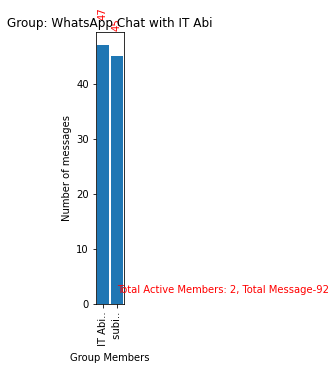

In [10]:
df=pd.DataFrame(list_of_date_time_author_msg,columns=["Date","Time","GroupMember","Message"])

l=dict(df['GroupMember'].value_counts())
xval=[]
yval=[]
for x,y in l.items():
    xval.append(x)
    yval.append(y)

def showAll():

    plt.figure(figsize=(len(l)*0.25,5))
    plt.bar(xval,yval,width=0.8)
    
    plt.title("Group: "+title1)
    plt.xlabel("Group Members")
    plt.ylabel("Number of messages")
    plt.xticks(xval,rotation=90)
    
    
showAll()
c3=0
def autolabel(x,y):
    global c3
    for i in range(len(x)):

        plt.text(x[i],y[i]+5,str(y[i]),ha='center',rotation=90,color='red')
        c3+=y[i]
autolabel(xval,yval)
plt.text(len(l)-len(l)//2,len(l), 'Total Active Members: '+str(len(l))+", Total Message-"+str(c3),color='red')

plt.show()
#plt.savefig('test.png')